In [1]:
import numpy as np
import pymc3 as pm
import arviz as ar
import seaborn as sns
import scipy.stats as sts
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
dist = sts.distributions
from sklearn.metrics import mean_squared_error
from math import sqrt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 1. Generationg 10 points from a function f(x) = cos(2πx)

In [2]:
n=10
x=np.linspace(0,1,n)
fx=np.cos(2*np.pi*x)

In [3]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [4]:
fx

array([ 1.        ,  0.76604444,  0.17364818, -0.5       , -0.93969262,
       -0.93969262, -0.5       ,  0.17364818,  0.76604444,  1.        ])

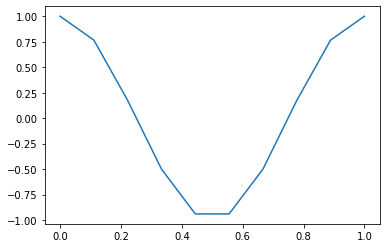

In [5]:
plt.plot(x, fx)
plt.show()







# 2. Using function f to add Gaussian errors ε with mean zero and variance 12 to generate 10 points

In [6]:
 ε = np.random.normal(0, np.sqrt(12), n)

In [7]:
y = fx + ε

In [8]:
print(ε)

[-5.90361505 -1.05493182  1.42911118 -4.83371855  1.81501898  0.92350219
 -1.27391053 -7.27535399  0.33568115  1.56127602]


In [9]:
print(y)

[-4.90361505 -0.28888738  1.60275936 -5.33371855  0.87532636 -0.01619043
 -1.77391053 -7.10170581  1.1017256   2.56127602]


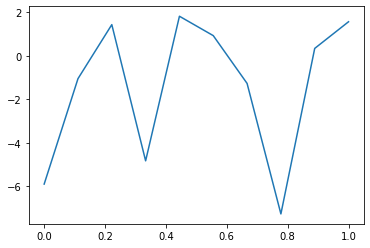

In [10]:
plt.plot(x, ϵ)
plt.show()

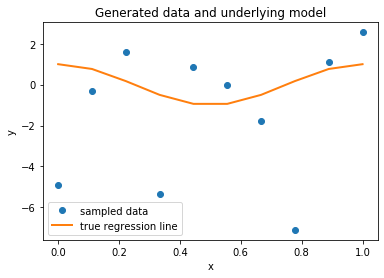

In [11]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'o', label='sampled data')
ax.plot(x, fx, label='true regression line', lw=2.)
plt.legend(loc=0);

# 3. Fitting the polynomials of degrees 1, 2, 3, 4, 5, 6, 7, 8, 9 on the 10 points

In [12]:
n=10
saved_coefficients=[]
for i in range(1, n):
    degree=i
    coefficients = np.polyfit(x,y,degree)
    polynomials = np.poly1d(coefficients)
    saved_coefficients.append(coefficients)

# 4. Sketching the 10 points and its corresponding polynomials 

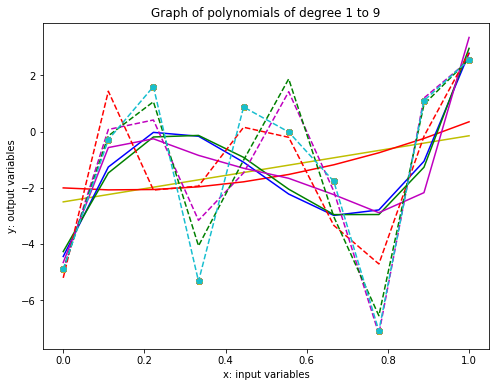

In [18]:
p1=np.poly1d(np.polyfit(x,y,1))
p2=np.poly1d(np.polyfit(x,y,2))
p3=np.poly1d(np.polyfit(x,y,3))
p4=np.poly1d(np.polyfit(x,y,4))
p5=np.poly1d(np.polyfit(x,y,5))
p6=np.poly1d(np.polyfit(x,y,6))
p7=np.poly1d(np.polyfit(x,y,7))
p8=np.poly1d(np.polyfit(x,y,8))
p9=np.poly1d(np.polyfit(x,y,9))

plt.figure(figsize=(8, 6))
plt.plot(x,y,'o', x, p1(x), 'y-')
plt.plot(x,y,'o', x, p2(x), 'r-')
plt.plot(x,y,'o', x, p3(x), 'b-')
plt.plot(x,y,'o', x, p4(x), 'g-')
plt.plot(x,y,'o', x, p5(x), 'm-')
plt.plot(x,y,'o', x, p6(x),'r--')
plt.plot(x,y,'o', x, p7(x),'m--') 
plt.plot(x,y,'o', x, p8(x),'g--')
plt.plot(x,y,'o', x, p9(x),'p--')
plt.xlabel('x: input variables')
plt.ylabel('y: output variables')
plt.title('Graph of polynomials of degree 1 to 9')
plt.show()

# 5. Creating table of weights for each polynomial

##### I have struggled to get my polynomial summary right, then below I just printed the correct and complete coefficients in a form of arrays

In [19]:
model = sm.OLS(x, y)
results = model.fit()
print(results.summary())

C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.044
Model:                            OLS   Adj. R-squared (uncentered):             -0.063
Method:                 Least Squares   F-statistic:                             0.4099
Date:                Sat, 09 May 2020   Prob (F-statistic):                       0.538
Time:                        03:03:09   Log-Likelihood:                         -8.7440
No. Observations:                  10   AIC:                                      19.49
Df Residuals:                       9   BIC:                                      19.79
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
saved_coefficients

[array([ 2.35548501, -2.50543655]),
 array([ 3.36178603, -1.00630102, -2.00739417]),
 array([  70.67069837, -102.64426153,   39.21492361,   -4.45033189]),
 array([ 26.3616715 ,  17.94735538, -69.77353535,  32.70586892,
         -4.2767571 ]),
 array([ 381.73730384, -927.9815881 ,  850.54312095, -364.32392411,
          68.04221844,   -4.66464239]),
 array([-4.44626289e+03,  1.37205260e+04, -1.59235147e+04,  8.61029486e+03,
        -2.16720094e+03,  2.14174814e+02, -5.21226313e+00]),
 array([-2.36230490e+04,  7.82344088e+04, -1.00210770e+05,  6.22030459e+04,
        -1.90200763e+04,  2.49213108e+03, -6.81955502e+01, -4.95115275e+00]),
 array([ 4.96608741e+04, -2.22266545e+05,  4.02685453e+05, -3.78311665e+05,
         1.95783129e+05, -5.44294970e+04,  7.18673463e+03, -3.00988513e+02,
        -4.91862464e+00]),
 array([-7.79118278e+05,  3.55569313e+06, -6.84901547e+06,  7.23482286e+06,
        -4.55076362e+06,  1.72731143e+06, -3.80434555e+05,  4.33798898e+04,
        -1.86790994e+03, -4

# 6. Computing Root Mean Square Error (RMSE) for each polynomial

In [21]:
rmse1 = np.sqrt(mean_squared_error(y, p1(x)))
rmse2 = np.sqrt(mean_squared_error(y, p2(x)))
rmse3 = np.sqrt(mean_squared_error(y, p3(x)))
rmse4 = np.sqrt(mean_squared_error(y, p4(x)))
rmse5 = np.sqrt(mean_squared_error(y, p5(x)))
rmse6 = np.sqrt(mean_squared_error(y, p6(x)))
rmse7 = np.sqrt(mean_squared_error(y, p7(x)))
rmse8 = np.sqrt(mean_squared_error(y, p8(x)))
rmse9 = np.sqrt(mean_squared_error(y, p9(x)))


print('RMSE for polynomial of degree 1: ', rmse1)
print('RMSE for polynomial of degree 2: ', rmse2)
print('RMSE for polynomial of degree 3: ', rmse3)
print('RMSE for polynomial of degree 4: ', rmse4)
print('RMSE for polynomial of degree 5: ', rmse5)
print('RMSE for polynomial of degree 6: ', rmse6)
print('RMSE for polynomial of degree 7: ', rmse7)
print('RMSE for polynomial of degree 8: ', rmse8)
print('RMSE for polynomial of degree 9: ', rmse9)

RMSE for polynomial of degree 1:  3.0657608100652305
RMSE for polynomial of degree 2:  3.050891520319118
RMSE for polynomial of degree 3:  2.5308423972497693
RMSE for polynomial of degree 4:  2.5255828211886713
RMSE for polynomial of degree 5:  2.4601997407982914
RMSE for polynomial of degree 6:  1.9630080414152544
RMSE for polynomial of degree 7:  1.182353474965977
RMSE for polynomial of degree 8:  1.0465894767794302
RMSE for polynomial of degree 9:  1.1455021084874582e-09


Polynomial od degree  1


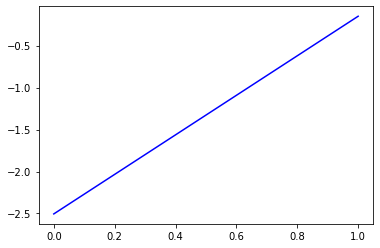

Polynomial od degree  2


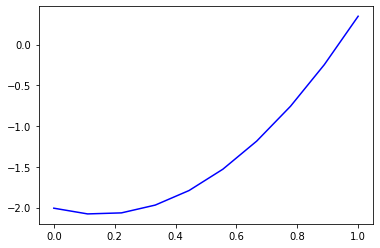

Polynomial od degree  3


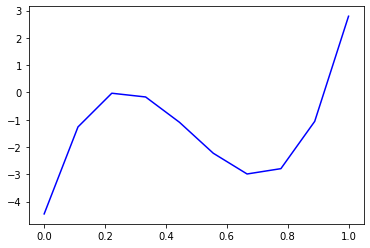

Polynomial od degree  4


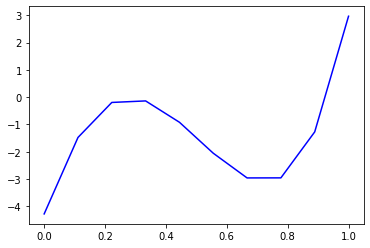

Polynomial od degree  5


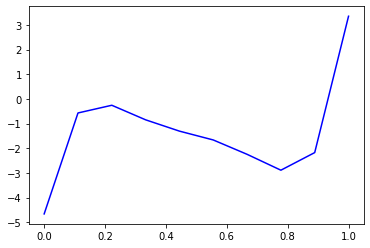

Polynomial od degree  6


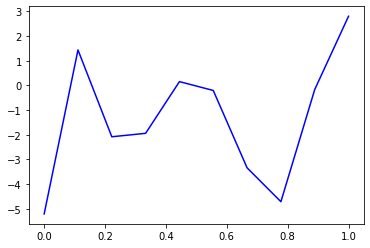

Polynomial od degree  7


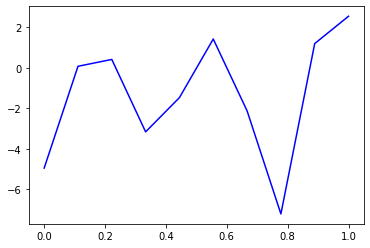

Polynomial od degree  8


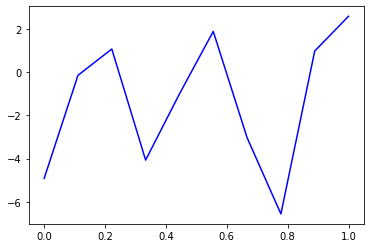

Polynomial od degree  9


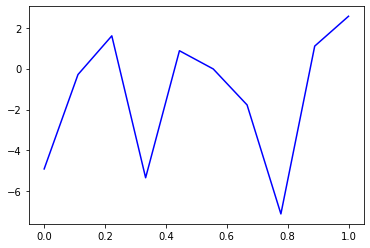

In [22]:
for i in range(1, 10):
    print('Polynomial od degree ', i)
    p = np.polyfit(x, y, i)
    plt.plot(x, np.polyval(p, x), color='blue')
    plt.show()

# 1. Coding probabilistic polynomial regression with pymc3

In [23]:
data = dict(x=x, y=y)

In [24]:
with pm.Model() as model:
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = pm.Normal('intercept', 0, sigma=20)
    x_coeff = pm.Normal('x', 0, sigma=20)

    likelihood = pm.Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    trace = pm.sample(1000, cores=9)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '1000' (I am process '11920')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (9 chains in 9 jobs)
NUTS: [x, intercept, sigma]
Sampling 9 chains: 100%|██████████| 13500/13500 [07:58<00:00, 28.24draws/s] 
The acceptance probability does not match the target. It is 0.8954508129249652, but should be close to 0.8. Try to increase the number of tuning steps.


In [25]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(3000, cores=9) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (9 chains in 9 jobs)
NUTS: [sd, x, Intercept]
Sampling 9 chains: 100%|██████████| 31500/31500 [07:47<00:00, 67.38draws/s]   
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8946864121114825, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Dahno Makaplan\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied val

<Figure size 432x288 with 0 Axes>

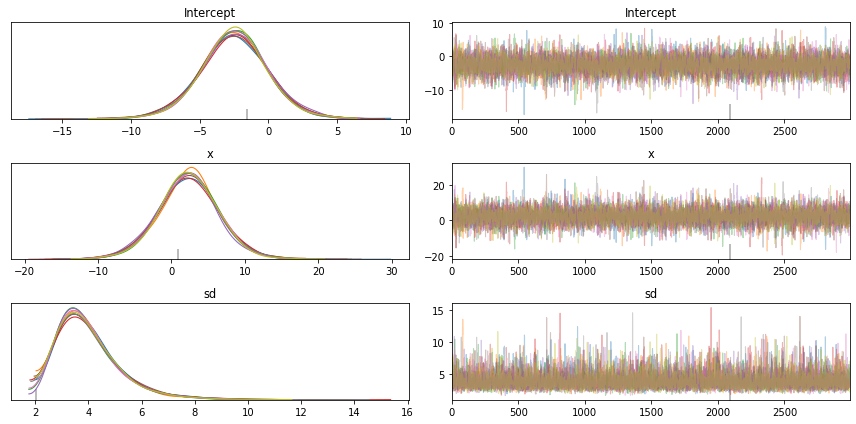

In [28]:
plt.figure(figsize=(6, 4))
pm.traceplot(trace[10:])
plt.tight_layout();

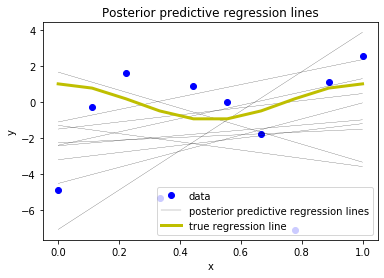

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'bo', label='data')
pm.plot_posterior_predictive_glm(trace, samples=10,
                              label='posterior predictive regression lines')
plt.plot(x, fx, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');